In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

In [129]:
df = pd.read_csv("Twitter.csv", encoding='latin1')
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22728\2601152679.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Twitter.csv", encoding='latin1')


,TweetID,Weekday,Hour,Day,Lang,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,text,LocationID,Country,State,Unnamed: 15,UserID,Unnamed: 17
0,tw-682712873332805633,Thursday,17.0,31.0,en,False,44.0,0.0,0.0,35.0,0.0,We are hiring: Senior Software Engineer - Proto http://www.reqcloud.com/jobs/719865/?k=0LaPxXuFwczs1e32ZURJKrgCIDMQtRO7BquFSQthUKY&utm_source=twitter&utm_campaign=reqCloud_JobPost #job @awscloud #job #protocol #networking #aws #mediastreaming,3751.0,United States,Washington,NaN,tw-40932430,NaN
1,tw-682713045357998080,Thursday,17.0,31.0,en,True,1810.0,5.0,0.0,53.0,2.0,RT @CodeMineStatus: This is true Amazon Web Services https://aws.amazon.com/ #php #html #html5 #css #webdesign #seo #java #javascript htt,3989.0,United States,Florida,NaN,tw-3179389829,NaN
2,tw-682713219375476736,Thursday,17.0,31.0,en,False,282.0,0.0,0.0,47.0,0.0,Devops Engineer Aws Ansible Cassandra Mysql Ubuntu Ruby On Rails Jobs in Austin TX #Austin #TX #jobs #jobsearch https://www.jobfindly.com/devops-engineer-aws-ansible-cassandra-mysql-ubuntu-ruby-on-rails-jobs-austin-tx.html,3741.0,United States,Texas,NaN,tw-4624808414,NaN
3,tw-682713436967579648,Thursday,17.0,31.0,en,False,2087.0,4.0,0.0,53.0,0.0,Happy New Year to all those AWS instances of ours!,3753.0,United States,California,NaN,tw-356447127,NaN
4,tw-682714048199311366,Thursday,17.0,31.0,en,False,953.0,0.0,0.0,47.0,0.0,Amazon is hiring! #Sr. #International Tax Manager - AWS in #Seattle apply now! #jobs http://neuvoo.com/job.php?id=dsvkrujig3&source=twitter&lang=en&client_id=658&l=Seattle%20Washington%20US&k=Sr.%20International%20Tax%20Manager%20-%20AWS http://twitter.com/NeuvooAccSea/status/682714048199311366/photo/1,3751.0,United States,Washington,NaN,tw-3172686669,NaN


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TweetID        100000 non-null  object 
 1    Weekday       100000 non-null  object 
 2    Hour          100000 non-null  float64
 3    Day           100000 non-null  float64
 4    Lang          100000 non-null  object 
 5    IsReshare     100000 non-null  object 
 6    Reach         100000 non-null  float64
 7    RetweetCount  100000 non-null  float64
 8    Likes         100000 non-null  float64
 9    Klout         100000 non-null  float64
 10   Sentiment     100000 non-null  float64
 11   text          100000 non-null  object 
 12   LocationID    100000 non-null  float64
 13   UserID        100000 non-null  object 
dtypes: float64(8), object(6)
memory usage: 10.7+ MB


In [61]:
df.describe()

,Hour,Day,Reach,RetweetCount,Likes,Klout,Sentiment,LocationID
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.412490,15.894960,8.542396e+03,8.052750,0.152770,40.389260,0.380921,2836.163440
std,6.053577,8.399852,8.867027e+04,97.863474,2.583633,13.636513,1.046559,1323.140242
min,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,-6.000000,1.000000
25%,7.000000,9.000000,1.510000e+02,0.000000,0.000000,32.000000,0.000000,1601.000000
50%,11.000000,16.000000,4.485000e+02,0.000000,0.000000,43.000000,0.000000,3738.000000
75%,16.000000,23.000000,1.496000e+03,3.000000,0.000000,49.000000,0.666667,3775.000000
max,23.000000,31.000000,1.034245e+07,26127.000000,133.000000,99.000000,7.333333,6289.000000


In [14]:
df.columns

Index(['TweetID', ' Weekday', ' Hour', ' Day', ' Lang', ' IsReshare', ' Reach',
       ' RetweetCount', ' Likes', ' Klout', ' Sentiment', ' text',
       ' LocationID', ' UserID'],
      dtype='object')

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


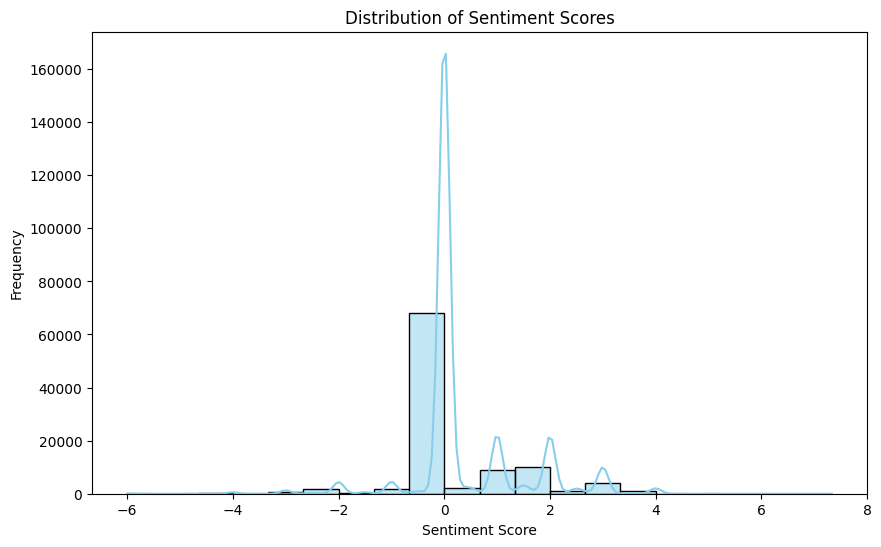

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df[' Sentiment'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [19]:
hourly_stats = df.groupby(' Hour').agg({' Likes': 'mean', ' RetweetCount': 'mean'}).reset_index()
hourly_stats

,Hour,Likes,RetweetCount
0,0.0,0.027496,11.188857
1,1.0,0.047775,9.923757
2,2.0,0.001593,10.021351
3,3.0,0.021132,9.306067
4,4.0,0.000000,8.279040
5,5.0,0.002006,6.101719
6,6.0,0.012635,7.805335
7,7.0,0.040131,9.683661
8,8.0,0.031109,6.387821
9,9.0,0.157513,7.174865


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

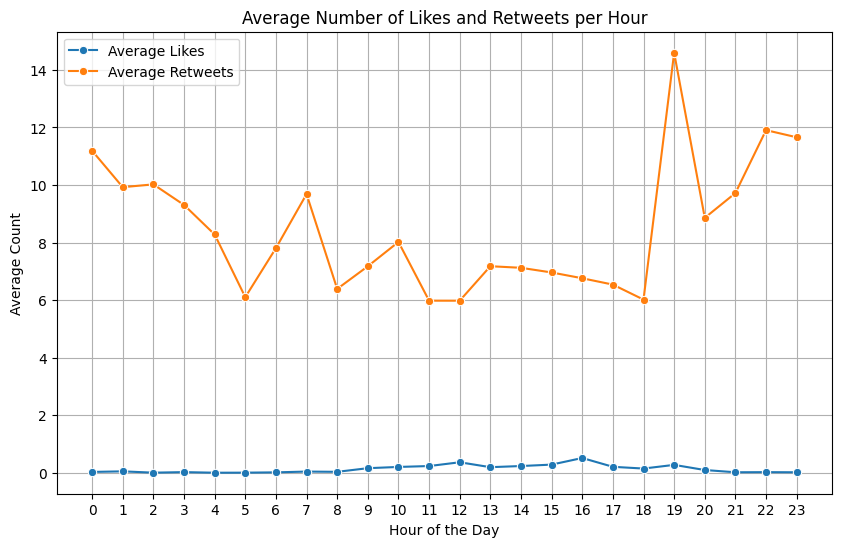

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=' Hour', y=' Likes', data=hourly_stats, label='Average Likes', marker='o')
sns.lineplot(x=' Hour', y=' RetweetCount', data=hourly_stats, label='Average Retweets', marker='o')
plt.title('Average Number of Likes and Retweets per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.legend()
plt.xticks(range(24))
plt.grid(True)
plt.show()

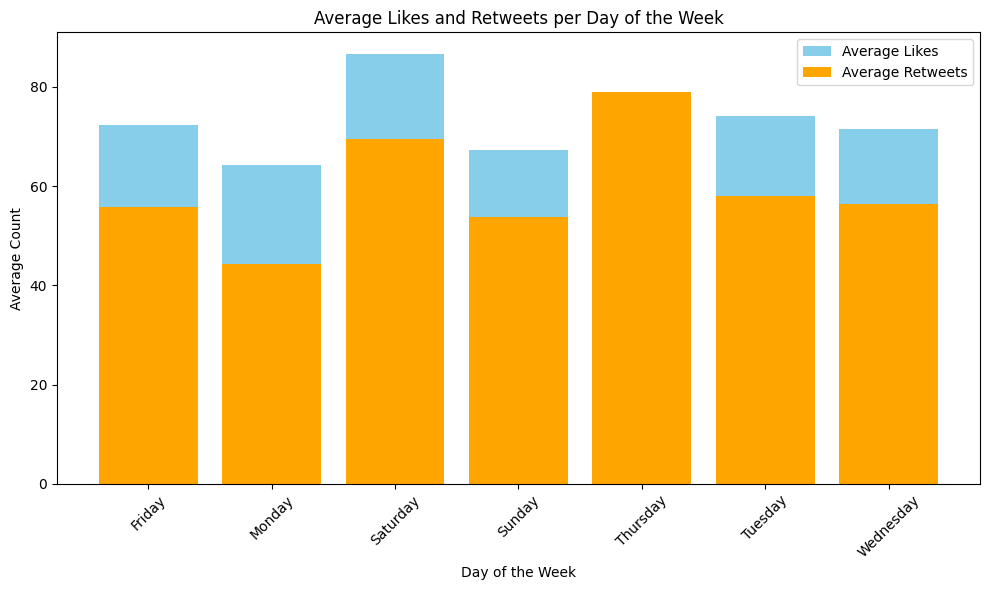

In [41]:
day_engagement = df.groupby(' Weekday')[[' Likes', ' RetweetCount']].mean().reset_index()

# Plot day-wise engagement
plt.figure(figsize=(10, 6))
plt.bar(day_engagement[' Weekday'], day_engagement[' Likes'], color='skyblue', label='Average Likes')
plt.bar(day_engagement[' Weekday'], day_engagement[' RetweetCount'], color='orange', label='Average Retweets')
plt.xlabel('Day of the Week')
plt.ylabel('Average Count')
plt.title('Average Likes and Retweets per Day of the Week')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

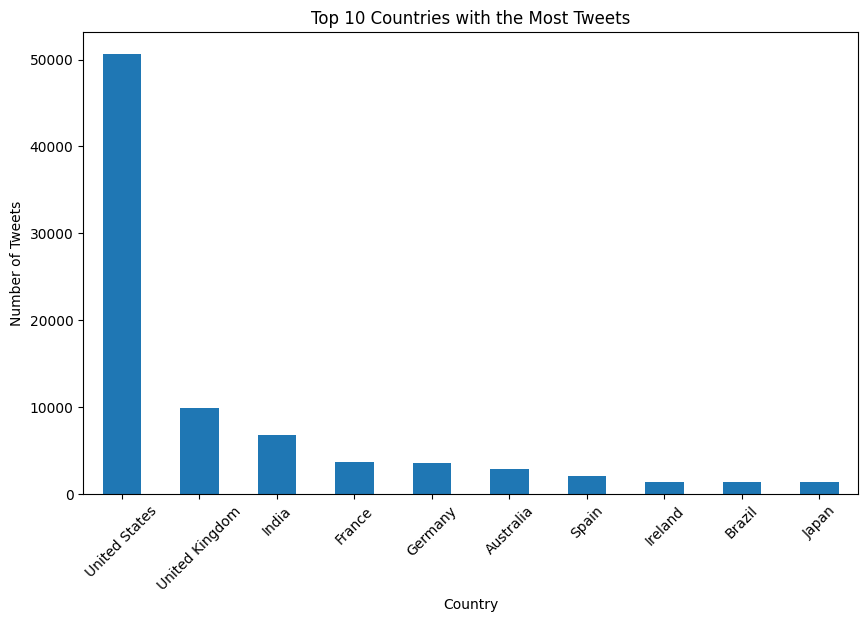

In [108]:
location_counts = df['Country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar')
plt.title('Top 10 Countries with the Most Tweets')
plt.xlabel('Country')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

In [104]:
location_counts = df['State'].value_counts()
print("Locations with the most tweets:")
print(location_counts.head(10))

Locations with the most tweets:
State
California        11567
Washington         8248
Greater London     5096
New York           3876
Massachusetts      3840
Texas              3107
Ile-de-France      2796
Maharashtra        1996
0                  1710
Illinois           1709
Name: count, dtype: int64


In [107]:
missing_state_count = df['State'].isnull().sum()

print("Number of missing values in the 'State' column:", missing_state_count)

Number of missing values in the 'State' column: 5


In [53]:
pd.set_option('display.max_colwidth', None)
top_likes_tweets = df.nlargest(50, ' Reach') 

# print("Top Tweets with Highest Number of Likes:")
# print(top_likes_tweets[['TweetID', ' Likes', ' text']])
top_likes_tweets.to_csv('top_reached_tweets.csv', index=False)

In [57]:
reach = pd.read_csv('top_reached_tweets.csv')
reach.head()

,TweetID,Weekday,Hour,Day,Lang,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,text,LocationID,UserID,Weekday
0,tw-715942363948974080,Friday,10.0,1.0,en,False,557713.0,43.0,63.0,73.0,0.0,Learn how @ipinfoio went from completing side projects to 250M daily requests using AWS. https://medium.com/get-put-post/from-side-project-to-250-million-daily-requests-909b9e373d94?adbsc=social_blogs_20160401_60011036&adbid=715942363948974080&adbpl=tw&adbpr=66780587#.454f3hjv9 http://twitter.com/awscloud/status/715942363948974080/photo/1,3751.0,tw-66780587,Friday
1,tw-714934156539486209,Tuesday,15.0,29.0,en,False,554158.0,50.0,70.0,72.0,0.0,How to detect and automatically revoke unintended IAM access with Amazon CloudWatch Events: http://blogs.aws.amazon.com/security/post/Tx2XGINRKCK9XNS/How-to-Detect-and-Automatically-Revoke-Unintended-IAM-Access-with-Amazon-CloudWa http://twitter.com/awscloud/status/714934156539486209/photo/1,3751.0,tw-66780587,Tuesday
2,tw-712655398575034368,Wednesday,9.0,23.0,en,False,546608.0,48.0,69.0,73.0,2.0,How to use the new AWS Encryption SDK to simplify data encryption and improve availability: http://blogs.aws.amazon.com/security/post/TxGBG3U5VUS2HY/How-to-Use-the-New-AWS-Encryption-SDK-to-Simplify-Data-Encryption-and-Improve-Ap?adbsc=social_20160323_59667316&adbid=712655398575034368&adbpl=tw&adbpr=66780587 http://twitter.com/awscloud/status/712655398575034368/photo/1,3751.0,tw-66780587,Wednesday
3,tw-711621861923160068,Sunday,12.0,20.0,en,False,543738.0,53.0,62.0,73.0,2.0,#AWS #CloudFormation now supports Amazon Elasticsearch Service. Learn more: http://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/aws-resource-elasticsearch-domain.html?adbsc=docs_20160320_59188396&adbid=711621861923160068&adbpl=tw&adbpr=66780587 http://twitter.com/awscloud/status/711621861923160068/photo/1,3751.0,tw-66780587,Sunday
4,tw-711253686522019840,Saturday,12.0,19.0,en,False,542714.0,73.0,62.0,73.0,0.0,You can now use Snowball to export data from Amazon S3 to your data center: http://docs.aws.amazon.com/AWSImportExport/latest/DG/create-export-job-steps.html?adbsc=docs_20160319_59188116&adbid=711253686522019840&adbpl=tw&adbpr=66780587 http://twitter.com/awscloud/status/711253686522019840/photo/1,3751.0,tw-66780587,Saturday


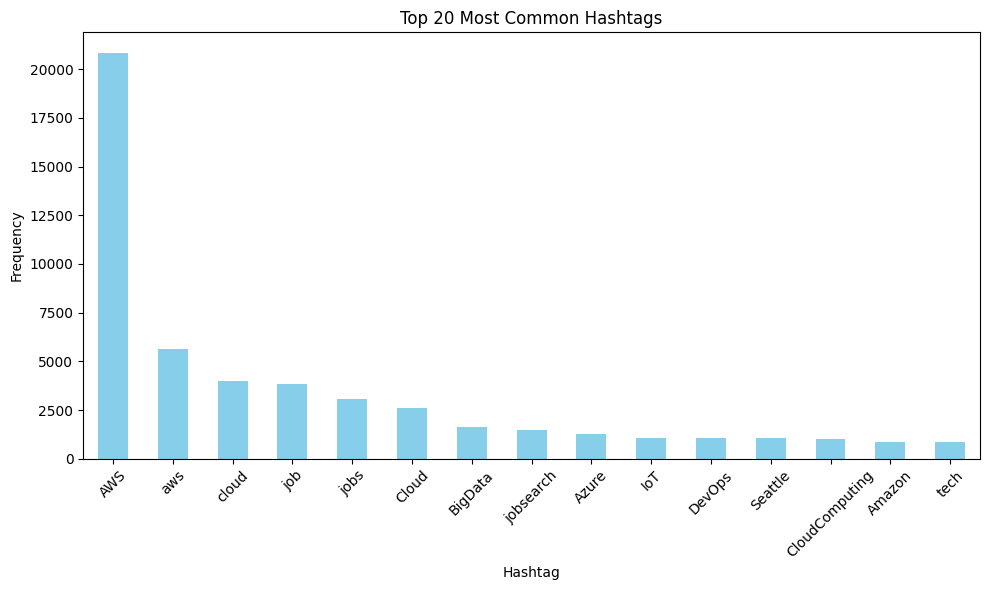

In [130]:
hashtags = df[' text'].str.findall(r'#(\w+)').explode()

hashtag_counts = hashtags.value_counts().head(15)  # Adjust the number to display more or fewer hashtags

# Plot the most common hashtags
plt.figure(figsize=(10, 6))
hashtag_counts.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Common Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

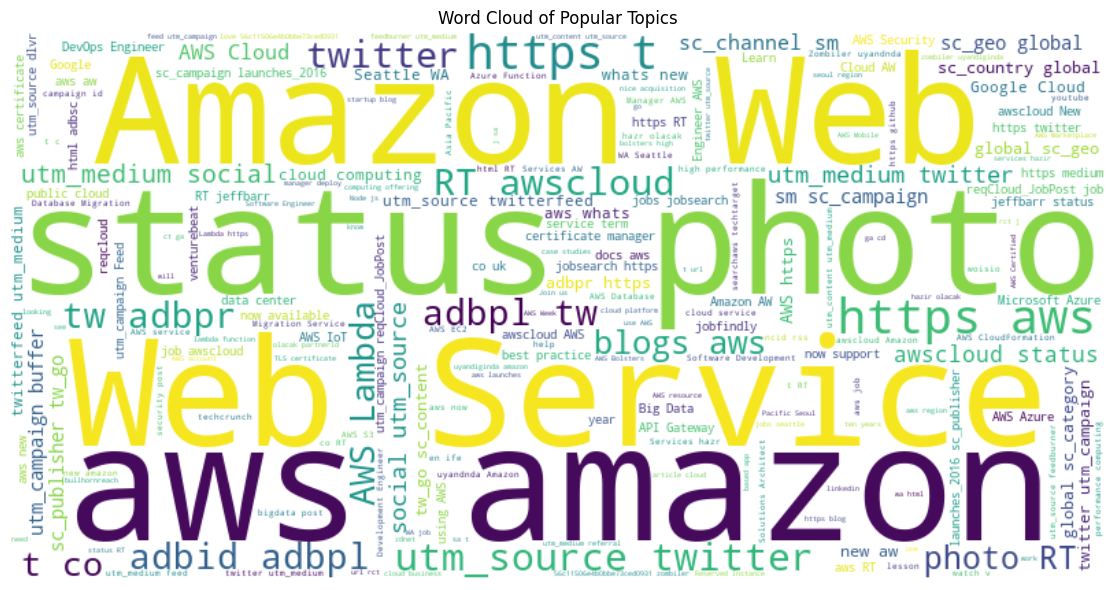

In [126]:
from wordcloud import WordCloud

# Replace NaN values with empty strings
df[' text'] = df[' text'].fillna('')

# Join the text from all tweets
all_text = ' '.join(df[' text'])

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Popular Topics')
plt.axis('off')
plt.tight_layout()
plt.show()


A wordcloud depicting the most used words in the tweets by the Twitter users

In [112]:
df_sorted = df.sort_values(by=' Reach', ascending=False)

top_reach_tweets = df_sorted.head(50)  
hashtags_top_reach = top_reach_tweets[' text'].str.findall(r'#(\w+)').explode()

hashtag_counts_top_reach = hashtags_top_reach.value_counts()

print("Top hashtags in tweets with the highest reach:")
print(hashtag_counts_top_reach.head(10))


Top hashtags in tweets with the highest reach:
 text
AWSSummit         4
DataWarehouse     2
CloudComputing    2
BigData           2
5ab1db3649e1      1
Build2016         1
LiveWireTV        1
SLAPTV            1
Aurora            1
DevOps            1
Name: count, dtype: int64


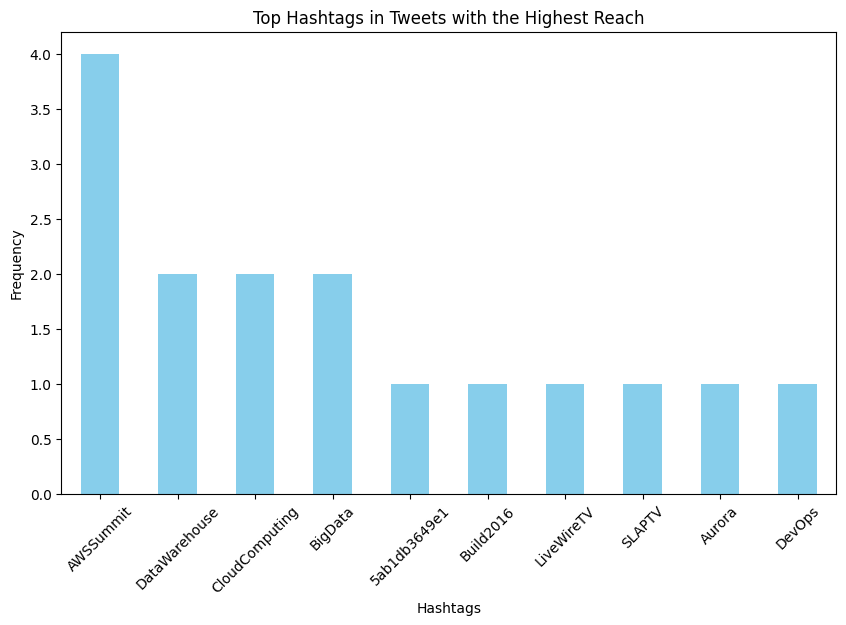

In [131]:
# Sort the dataframe based on the 'Reach' column in descending order
df_sorted = df.sort_values(by=' Reach', ascending=False)

# Extract hashtags from the tweets with the highest reach
top_reach_tweets = df_sorted.head(50)
hashtags_top_reach = top_reach_tweets[' text'].str.findall(r'#(\w+)').explode()

# Count the frequency of each hashtag
hashtag_counts_top_reach = hashtags_top_reach.value_counts()

# Display the most common hashtags in tweets with the highest reach
plt.figure(figsize=(10, 6))
hashtag_counts_top_reach.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Hashtags in Tweets with the Highest Reach')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Above are the hashtags with the highest reach

In [114]:
df_sorted = df.sort_values(by=' Reach', ascending=False)

top_reach_tweets = df_sorted[df_sorted[' text'].str.contains(r'#\w+', na=False)].head(15) 
top_reach_tweets.loc[:, 'hashtags'] = top_reach_tweets[' text'].str.findall(r'#(\w+)')

for index, row in top_reach_tweets.iterrows():
    tweet_id = row['TweetID']
    reach = row[' Reach']
    hashtags = row['hashtags']
    print(f"Tweet ID: {tweet_id}, Reach: {reach}, Hashtags: {hashtags}")

Tweet ID: tw-692240874357571586, Reach: 8196371.0, Hashtags: ['5ab1db3649e1']
Tweet ID: tw-715722869163089920, Reach: 6485485.0, Hashtags: ['Build2016']
Tweet ID: tw-710348402274357248, Reach: 892629.0, Hashtags: ['LiveWireTV', 'SLAPTV']
Tweet ID: tw-716325720666935296, Reach: 559150.0, Hashtags: ['Aurora']
Tweet ID: tw-716312776675753985, Reach: 559058.0, Hashtags: ['AWSSummit']
Tweet ID: tw-716285623842123776, Reach: 558825.0, Hashtags: ['DataWarehouse']
Tweet ID: tw-716143949325271043, Reach: 558107.0, Hashtags: ['AWSSummit']
Tweet ID: tw-716002452487667713, Reach: 557925.0, Hashtags: ['CloudComputing']
Tweet ID: tw-715999246483394561, Reach: 557925.0, Hashtags: ['DevOps']
Tweet ID: tw-715992161150504962, Reach: 557916.0, Hashtags: ['BigData']
Tweet ID: tw-715707563329761281, Reach: 556709.0, Hashtags: ['BigData']
Tweet ID: tw-715665510822596609, Reach: 556616.0, Hashtags: ['DataWarehouse']
Tweet ID: tw-715664004023070720, Reach: 556611.0, Hashtags: ['AWSSumit']
Tweet ID: tw-7156579

Above I have showed the tweet with the highest reach and the hashtag used in the tweet

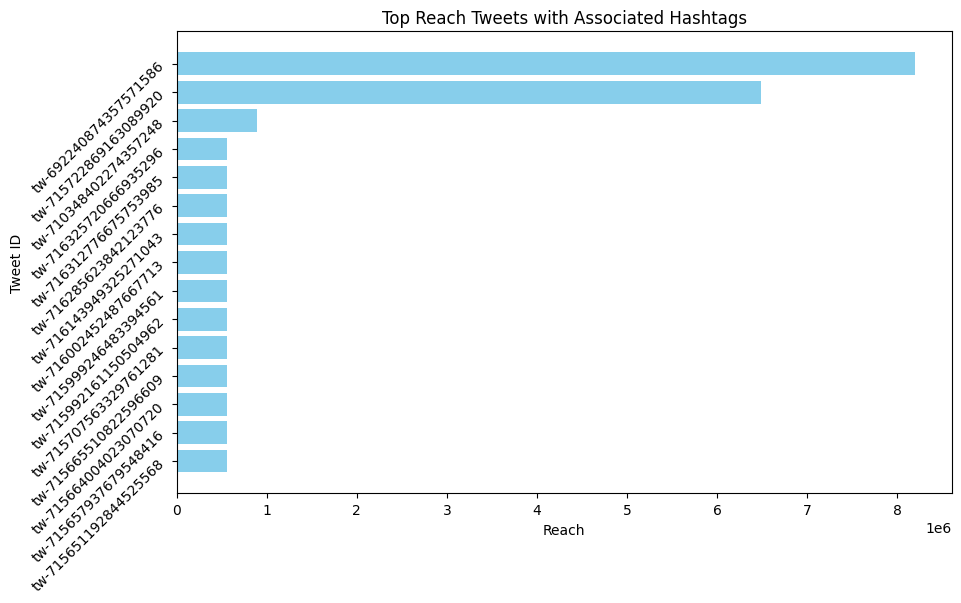

In [115]:
plt.figure(figsize=(10, 6))
plt.barh(top_reach_tweets['TweetID'], top_reach_tweets[' Reach'], color='skyblue')
plt.xlabel('Reach')
plt.ylabel('Tweet ID')
plt.title('Top Reach Tweets with Associated Hashtags')
plt.yticks(rotation=45)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest reach tweet at the top
plt.show()


In [116]:
# Define the metrics for interactions
interaction_metrics = [' Likes', ' RetweetCount', ' Reach', ' Klout'] 

# Compute the total interactions for each account
df['TotalInteractions'] = df[interaction_metrics].sum(axis=1)

# Group by User ID and compute the total interactions
user_interactions = df.groupby(' UserID')['TotalInteractions'].sum().reset_index()

# Sort the users based on total interactions in descending order
user_interactions_sorted = user_interactions.sort_values(by='TotalInteractions', ascending=False)

# Compute the total interactions for the forum/group
total_forum_interactions = user_interactions_sorted['TotalInteractions'].sum()

# Compute the share voice for each user
user_interactions_sorted['ShareVoice'] = (user_interactions_sorted['TotalInteractions'] / total_forum_interactions) * 100

# Display the most interactive public accounts, their total interactions, and share voice
print("Most interactive public accounts of the forum/group:")
print(user_interactions_sorted[[' UserID', 'TotalInteractions', 'ShareVoice']].head(10))


Most interactive public accounts of the forum/group:
             UserID  TotalInteractions  ShareVoice
29313   tw-66780587        427738375.0   49.789179
31215     tw-816653         56684294.0    6.598109
14149  tw-243360038         16651761.0    1.938282
26141      tw-48443         15531820.0    1.807920
6386    tw-15812482         12327628.0    1.434948
18995    tw-3108351         10342577.0    1.203886
32325   tw-91478624          8196520.0    0.954083
6985    tw-16309969          7838310.0    0.912387
15434   tw-26191233          6925877.0    0.806179
22165   tw-36773483          6014154.0    0.700054


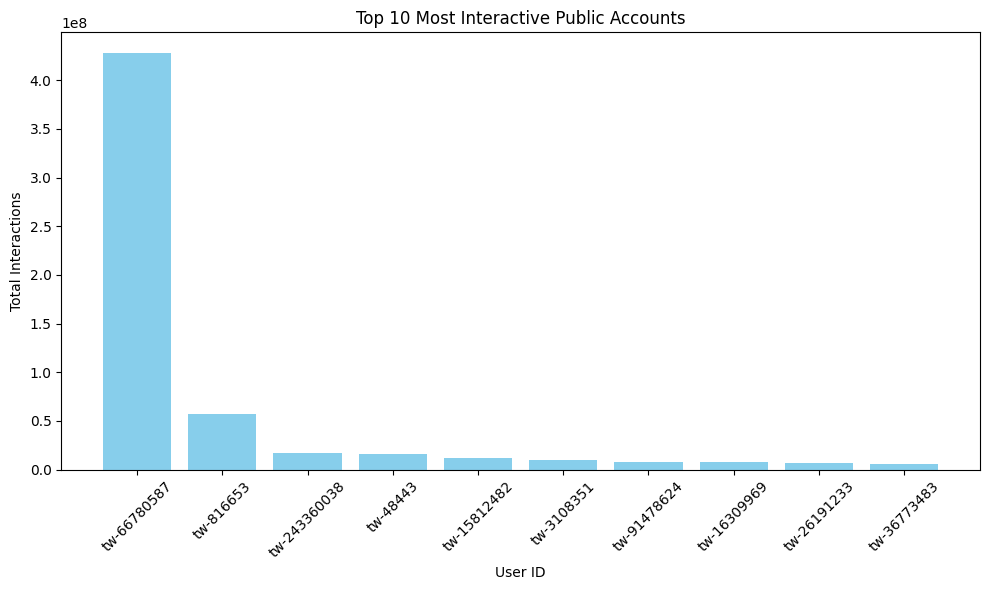

In [117]:
plt.figure(figsize=(10, 6))

# Plot the total interactions for each user
plt.bar(user_interactions_sorted[' UserID'][:10], user_interactions_sorted['TotalInteractions'][:10], color='skyblue')

# Add labels and title
plt.xlabel('User ID')
plt.ylabel('Total Interactions')
plt.title('Top 10 Most Interactive Public Accounts')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

I first calculated the total interactions for each user by summing up the values of various interaction metrics like likes, retweet counts, reach, and Klout score.

Then grouped the dataset by user ID and computed the total interactions for each user. Later sorted the users based on their total interactions in descending order.

To calculate the share of voice for each user, I divided their total interactions by the total interactions of all users in the forum or group and multiplied by 100 to get the percentage.

In [119]:
interactions_tw_66780587 = df[df[' UserID'] == 'tw-66780587']['TotalInteractions'].sum()

# Calculate the share voice
total_interactions_forum = df['TotalInteractions'].sum()
share_voice_tw_66780587 = (interactions_tw_66780587 / total_interactions_forum) * 100

# Find the number of posts made by the account
posts_tw_66780587 = df[df[' UserID'] == 'tw-66780587'].shape[0]

# Calculate the rate
total_posts_forum = df.shape[0]
rate_tw_66780587 = (posts_tw_66780587 / total_posts_forum) * 100

# Print the details
print("Details for account 'tw-66780587':")
print(f"Interactions: {interactions_tw_66780587}")
print(f"Share voice: {share_voice_tw_66780587:.2f}%")
print(f"Posts: {posts_tw_66780587}")
print(f"Rate: {rate_tw_66780587:.2f}%")


Details for account 'tw-66780587':
Interactions: 427738375.0
Share voice: 49.79%
Posts: 845
Rate: 0.84%


Calculated some of the metrics for the most interactive twitter account.

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster 0 Texts:
1. Spark on EMR http://tech.adroll.com/blog/spark/2016/01/25/spark-on-emr.html #pyspark #aws via @AdRollDev. Putting together @awscloud Lambda EMR large scale and machine learning.
2. Analysis: Cost of AWS vs. Softlayer #Cloud . Watch th video http://www.cirba.com/AWSvsSoftlayer/ #IBM
3. "Retweeted Evan Kirstel (@evankirstel):Microsoft slashes Azure prices up to 17% to keep up with AWS... https://t.co/dulgvt8ywD"

Cluster 1 Texts:
1. RT @TechCrunch: Spotinst which helps you buy AWS spot instances raises $2m Series A http://techcrunch.com/2016/03/08/spotinst-which-helps-you-buy-aws-spot-instances-raises-2m-series-a/?ncid=rss&utm_source=feedburner&utm_medium=feed&utm_campaign=Feed:%20Techcrunch%20(TechCrunch)&sr_share=twitter
2. RT @awscloud: Join our webinar to learn to integrate Amazon #MachineLearning into your applications! https://event.on24.com/eventRegistration/EventLobbyServlet?target=reg20.jsp&partnerref=ml-web-day-first-post-en-webinar-twitter-us&eventid=11198

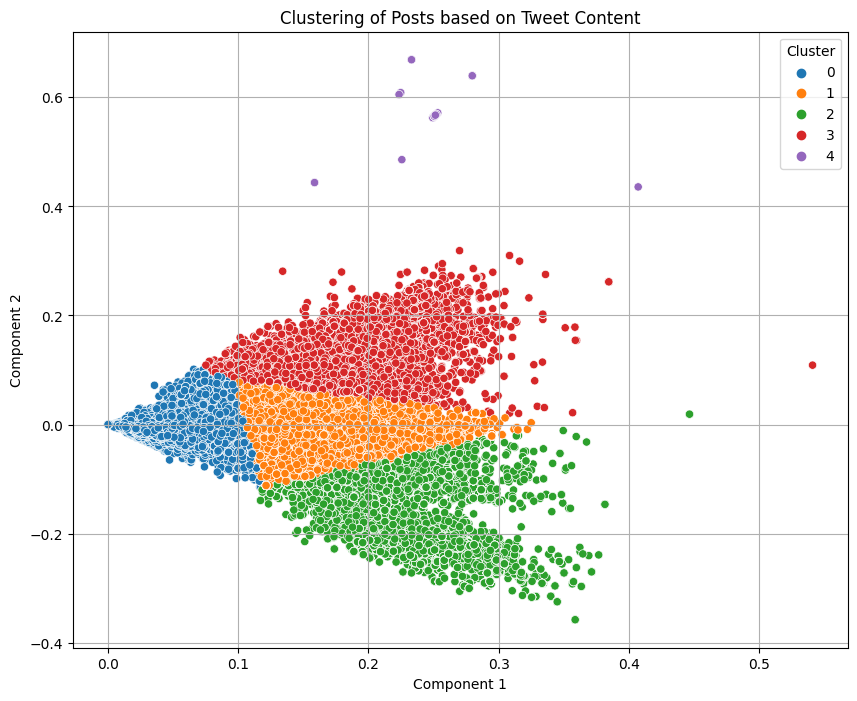

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Create a K-means clustering pipeline
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('svd', TruncatedSVD(n_components=2)), 
    ('kmeans', KMeans(n_clusters=5, random_state=42))  
])

pipeline.fit(df[' text'].fillna(''))

cluster_labels = pipeline.named_steps['kmeans'].labels_
df['cluster'] = cluster_labels

for cluster_id in range(5): 
    print(f"\nCluster {cluster_id} Texts:")
    cluster_texts = df[df['cluster'] == cluster_id][' text'].sample(n=3, random_state=42) 
    for idx, text in enumerate(cluster_texts, start=1):
        print(f"{idx}. {text}")

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pipeline.named_steps['svd'].transform(pipeline.named_steps['tfidf'].transform(df[' text'].fillna('')))[:, 0], 
                y=pipeline.named_steps['svd'].transform(pipeline.named_steps['tfidf'].transform(df[' text'].fillna('')))[:, 1], 
                hue=cluster_labels, palette='tab10', legend='full')
plt.title('Clustering of Posts based on Tweet Content')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()